## Persistent Homology tests using ripster
---
We first import libraries and define ploting finctions.

In [ ]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams

In [126]:
def scatter_2d(data):
    plt.figure(figsize=(3, 3))
    plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.6)
    plt.title('2D Scatter Plot of Random Data')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)

def scatter_3d(data):
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='green', alpha=0.6)
    ax.set_title('3D Scatter Plot of Random Data')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

---
We now define some test datasets:
- 2D random
- 2D circle-like
- 3D random
- 3D torus-like

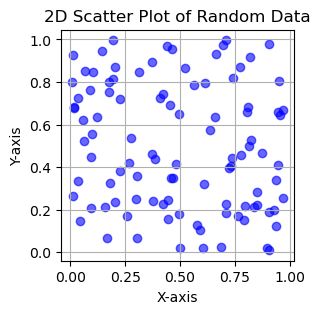

In [127]:
random_2d_data = np.random.random((100,2))
scatter_2d(random_2d_data)

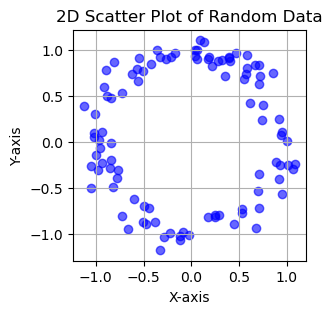

In [132]:
angles = np.random.uniform(0, 2 * np.pi, 100)

# Generate random radii around 1 with some noise
radii = np.random.normal(loc=1.0, scale=0.1, size=100)

# Convert polar coordinates to Cartesian coordinates
x = radii * np.cos(angles)
y = radii * np.sin(angles)

circ_data = np.column_stack((x, y))

scatter_2d(circ_data)

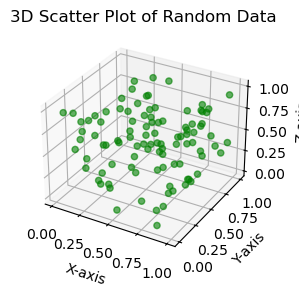

In [130]:
random_3d_data = np.random.random((100, 3))
scatter_3d(random_3d_data)

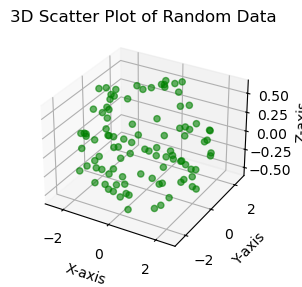

In [161]:
# Parameters for the torus
R = 2.0  # Major radius
r = 0.5  # Minor radius
n_points = 100

# Generate random angles for the torus
theta = np.random.uniform(0, 2 * np.pi, n_points)  # Angle around the major circle
phi = np.random.uniform(0, 2 * np.pi, n_points)    # Angle around the tube

# Add noise to the minor radius
r_noise = np.random.normal(loc=r, scale=0.05, size=n_points)

# Parametric equations for the torus
x = (R + r_noise * np.cos(phi)) * np.cos(theta)
y = (R + r_noise * np.cos(phi)) * np.sin(theta)
z = r_noise * np.sin(phi)

torus_data = np.column_stack((x, y, z))

scatter_3d(torus_data)


---
Finally, we compute the persistent homology groups

In [ ]:
ripser(circ_data, maxdim=3)

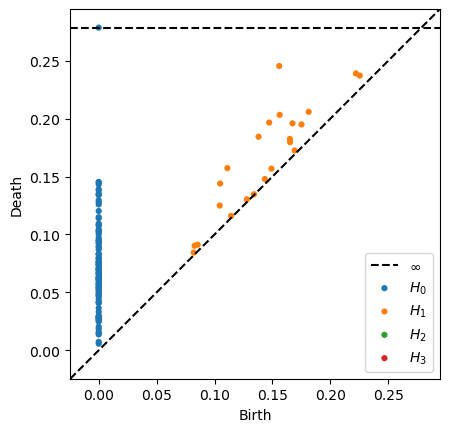

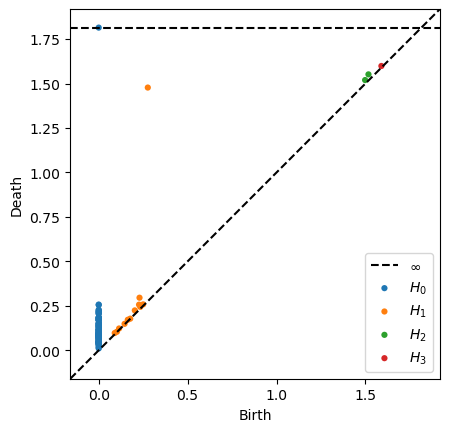

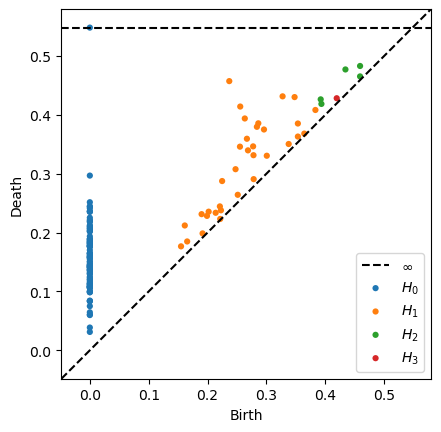

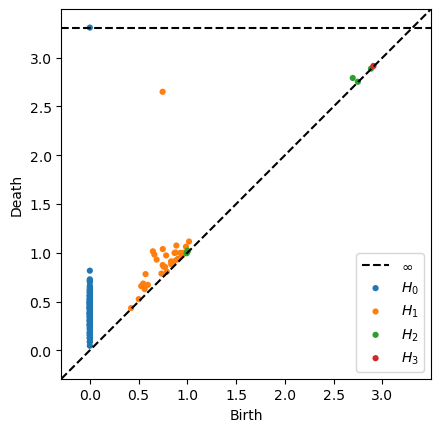

In [163]:
diagrams = ripser(random_2d_data, maxdim=3)['dgms']
plot_diagrams(diagrams, show=True)

diagrams = ripser(circ_data, maxdim=3)['dgms']
plot_diagrams(diagrams, show=True)

diagrams = ripser(random_3d_data, maxdim=3)['dgms']
plot_diagrams(diagrams, show=True)

diagrams = ripser(torus_data, maxdim=3)['dgms']
plot_diagrams(diagrams, show=True)